In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.api import Holt
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import ExponentialSmoothing

In [11]:
df = pd.read_csv(r"C:\Users\Administrator.DAI-PC2\Downloads\Shubham\Practical Machine Learning\ClassWork\Datasets\FMAC-HPI_24420.csv")
y_train = df['NSA Value'][:-12]
y_test = df['NSA Value'][-12:]

In [12]:
#### NSA Moving avg

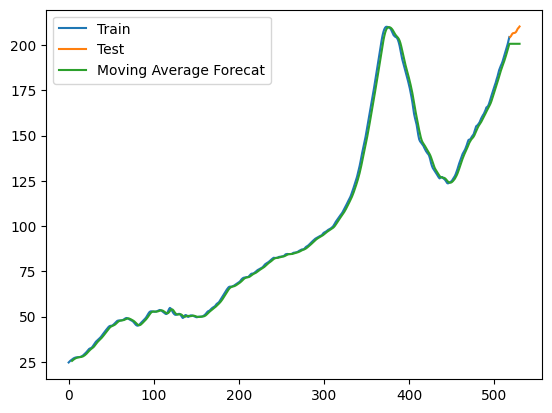

6.742864962206807


In [52]:
span = 5
fcast = y_train.rolling(span,center=False).mean()
MA = fcast.iloc[-1]
MA_Series = pd.Series(MA.repeat(len(y_test)))
MA_fcast = pd.concat([fcast,MA_Series],ignore_index=True)
plt.plot(y_train,label='Train')
plt.plot(y_test,label='Test')
plt.plot(MA_fcast,label='Moving Average Forecat')
plt.legend(loc = 'best')
plt.show()
rms= np.sqrt(mean_squared_error(y_test,MA_Series))

print(rms)

In [53]:
###### SES 

C:\Users\Administrator.DAI-PC2\anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


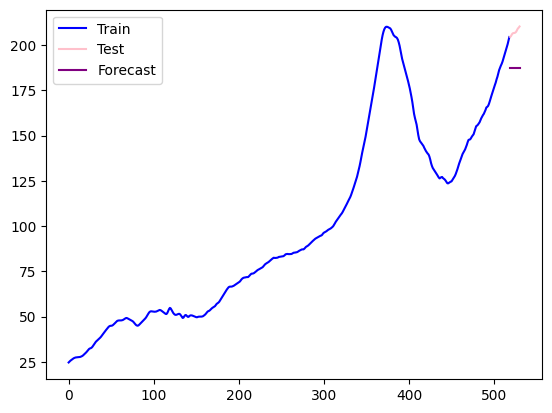

RMSE =  20.02623329973557


In [54]:
alpha = 0.08
ses = SimpleExpSmoothing(y_train)
fit1= ses.fit(smoothing_level=alpha)
fcast1 = fit1.forecast(len(y_test))

y_train.plot(color='blue',label='Train')
y_test.plot(color='pink',label='Test')
fcast1.plot(color='purple',label='Forecast')
plt.legend(loc = 'best')
plt.show()
print("RMSE = ",np.sqrt(mean_squared_error(y_test,fcast1)))

In [55]:
####### Holt linear trend method

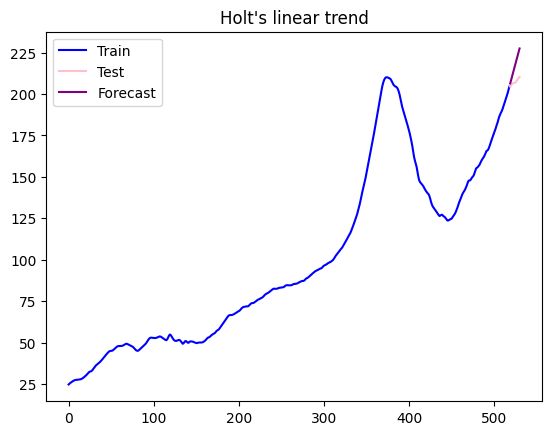

RMSE =  10.89420581486658


In [56]:
holt = Holt(y_train)
fit1= holt.fit()
fcast1 = fit1.forecast(len(y_test))

y_train.plot(color='blue',label='Train')
y_test.plot(color='pink',label='Test')
fcast1.plot(color='purple',label='Forecast')
plt.title("Holt's linear trend")
plt.legend(loc = 'best')
plt.show()
print("RMSE = ",np.sqrt(mean_squared_error(y_test,fcast1)))

In [57]:
####### Holt Exponential trend method

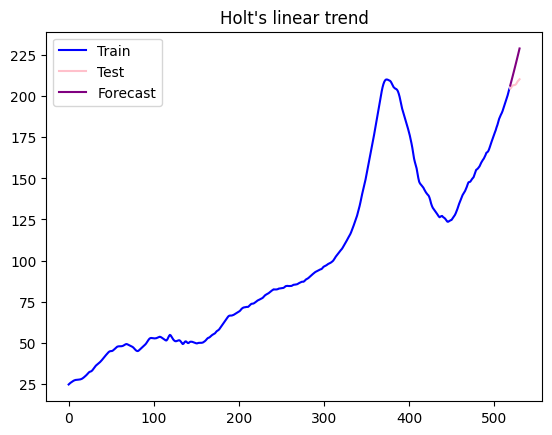

RMSE =  11.606752290714251


In [58]:
alpha = 0.5
beta = 0.2
holt = Holt(y_train, exponential =True)
#fit1= holt.fit(smoothing_level=alpha,smoothing_trend=beta)
fit1= holt.fit() # Auto tune to reduce train error can lead to overfitting
fcast1 = fit1.forecast(len(y_test))

y_train.plot(color='blue',label='Train')
y_test.plot(color='pink',label='Test')
fcast1.plot(color='purple',label='Forecast')
plt.title("Holt's linear trend")
plt.legend(loc = 'best')
plt.show()
print("RMSE = ",np.sqrt(mean_squared_error(y_test,fcast1)))

In [59]:
###### HW Additive

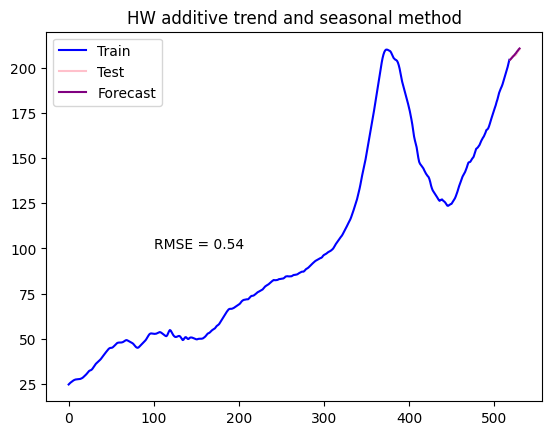

In [67]:
alpha = 0.8
beta = 0.01
gamma=0.1
hw_add= ExponentialSmoothing(y_train, seasonal_periods=12, trend='add',seasonal='add')
fit1= hw_add.fit(smoothing_level=alpha,smoothing_trend=beta,smoothing_seasonal=gamma)
#fit1= hw_add.fit()
fcast1 = fit1.forecast(len(y_test))

y_train.plot(color='blue',label='Train')
y_test.plot(color='pink',label='Test')
fcast1.plot(color='purple',label='Forecast')
error = round(sqrt(mean_squared_error(y_test,fcast1)),2)
plt.text(100,100,"RMSE = "+str(error))
plt.title("HW additive trend and seasonal method")
plt.legend(loc = 'best')
plt.show()

In [ ]:
### HW Multiplicative

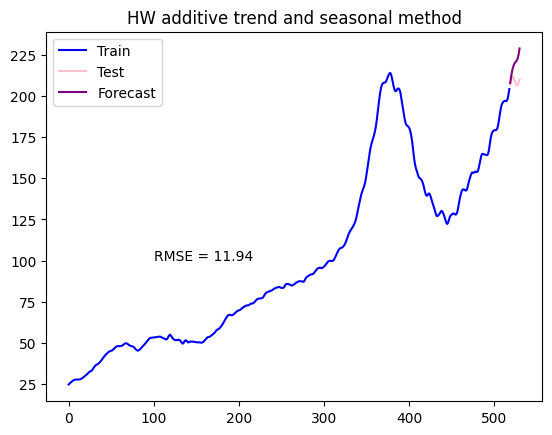

In [25]:
alpha = 1
beta = 0.08
gamma=0.01
hw_add= ExponentialSmoothing(y_train, seasonal_periods=12, trend='add',seasonal='mul')
#fit1= hw_add.fit(smoothing_level=alpha,smoothing_trend=beta,smoothing_seasonal=gamma)
fit1= hw_add.fit()
fcast1 = fit1.forecast(len(y_test))

y_train.plot(color='blue',label='Train')
y_test.plot(color='pink',label='Test')
fcast1.plot(color='purple',label='Forecast')
error = round(sqrt(mean_squared_error(y_test,fcast1)),2)
plt.text(100,100,"RMSE = "+str(error))
plt.title("HW additive trend and seasonal method")
plt.legend(loc = 'best')
plt.show()

In [ ]:
##### HW additive with damped

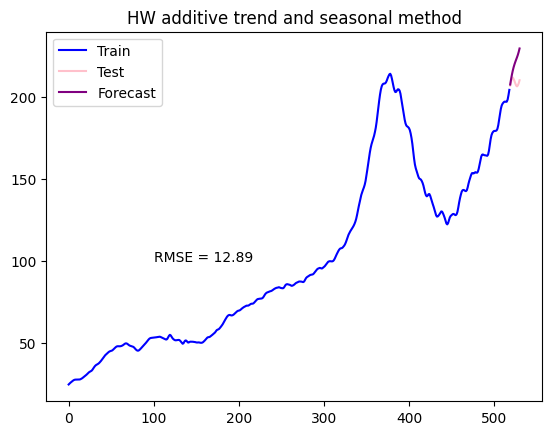

In [27]:
alpha = 0.9
beta = 0.5
gamma=0.1
phi=0.1
hw_add= ExponentialSmoothing(y_train, seasonal_periods=12, trend='add',seasonal='add',damped_trend=True)
#fit1= hw_add.fit(smoothing_level=alpha,smoothing_trend=beta,smoothing_seasonal=gamma,damping_trend=phi)
fit1= hw_add.fit()
fcast1 = fit1.forecast(len(y_test))

y_train.plot(color='blue',label='Train')
y_test.plot(color='pink',label='Test')
fcast1.plot(color='purple',label='Forecast')
error = round(sqrt(mean_squared_error(y_test,fcast1)),2)
plt.text(100,100,"RMSE = "+str(error))
plt.title("HW additive trend and seasonal method")
plt.legend(loc = 'best')
plt.show()

In [ ]:
##### HW multiplicative with damped

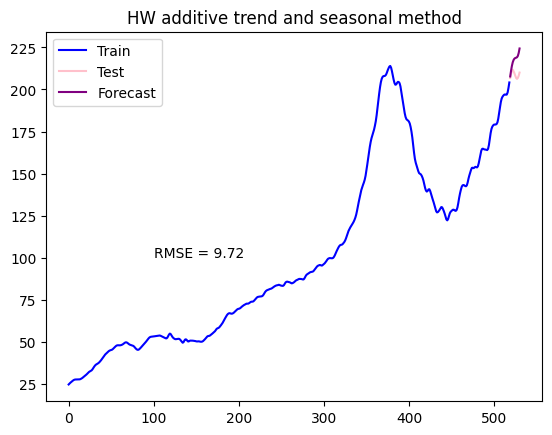

In [30]:
alpha = 0.9
beta = 0.5
gamma=0.1
phi=0.1
hw_add= ExponentialSmoothing(y_train, seasonal_periods=12, trend='add',seasonal='mul',damped_trend=True)
#fit1= hw_add.fit(smoothing_level=alpha,smoothing_trend=beta,smoothing_seasonal=gamma,damping_trend=phi)
fit1= hw_add.fit()
fcast1 = fit1.forecast(len(y_test))

y_train.plot(color='blue',label='Train')
y_test.plot(color='pink',label='Test')
fcast1.plot(color='purple',label='Forecast')
error = round(sqrt(mean_squared_error(y_test,fcast1)),2)
plt.text(100,100,"RMSE = "+str(error))
plt.title("HW additive trend and seasonal method")
plt.legend(loc = 'best')
plt.show()

In [ ]:
#### SA

In [31]:
y_train = df['SA Value'][:-12]
y_test = df['SA Value'][-12:]

In [32]:
#### NSA Moving avg

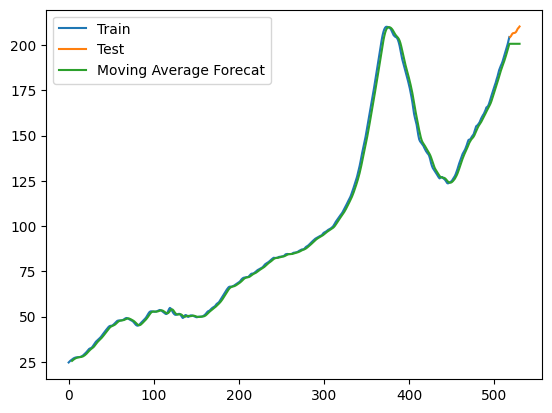

6.742864962206807


In [33]:
span = 5
fcast = y_train.rolling(span,center=False).mean()
MA = fcast.iloc[-1]
MA_Series = pd.Series(MA.repeat(len(y_test)))
MA_fcast = pd.concat([fcast,MA_Series],ignore_index=True)
plt.plot(y_train,label='Train')
plt.plot(y_test,label='Test')
plt.plot(MA_fcast,label='Moving Average Forecat')
plt.legend(loc = 'best')
plt.show()
rms= np.sqrt(mean_squared_error(y_test,MA_Series))

print(rms)

In [34]:
###### SES 

C:\Users\Administrator.DAI-PC2\anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


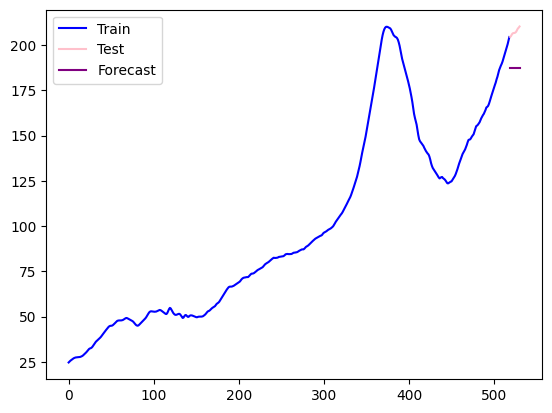

RMSE =  20.02623329973557


In [35]:
alpha = 0.08
ses = SimpleExpSmoothing(y_train)
fit1= ses.fit(smoothing_level=alpha)
fcast1 = fit1.forecast(len(y_test))

y_train.plot(color='blue',label='Train')
y_test.plot(color='pink',label='Test')
fcast1.plot(color='purple',label='Forecast')
plt.legend(loc = 'best')
plt.show()
print("RMSE = ",np.sqrt(mean_squared_error(y_test,fcast1)))

In [36]:
####### Holt linear trend method

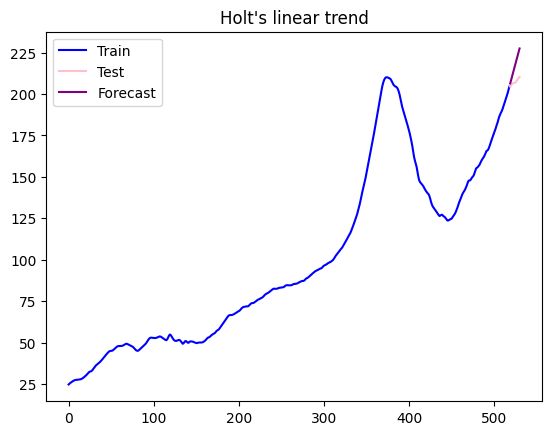

RMSE =  10.89420581486658


In [37]:
holt = Holt(y_train)
fit1= holt.fit()
fcast1 = fit1.forecast(len(y_test))

y_train.plot(color='blue',label='Train')
y_test.plot(color='pink',label='Test')
fcast1.plot(color='purple',label='Forecast')
plt.title("Holt's linear trend")
plt.legend(loc = 'best')
plt.show()
print("RMSE = ",np.sqrt(mean_squared_error(y_test,fcast1)))

In [38]:
####### Holt Exponential trend method

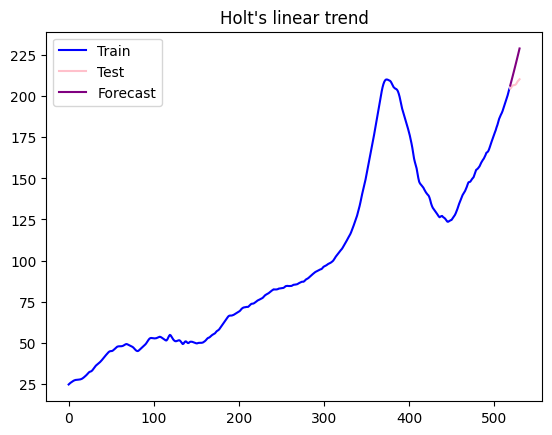

RMSE =  11.606752290714251


In [39]:
alpha = 0.5
beta = 0.2
holt = Holt(y_train, exponential =True)
#fit1= holt.fit(smoothing_level=alpha,smoothing_trend=beta)
fit1= holt.fit() # Auto tune to reduce train error can lead to overfitting
fcast1 = fit1.forecast(len(y_test))

y_train.plot(color='blue',label='Train')
y_test.plot(color='pink',label='Test')
fcast1.plot(color='purple',label='Forecast')
plt.title("Holt's linear trend")
plt.legend(loc = 'best')
plt.show()
print("RMSE = ",np.sqrt(mean_squared_error(y_test,fcast1)))

In [40]:
###### HW Additive

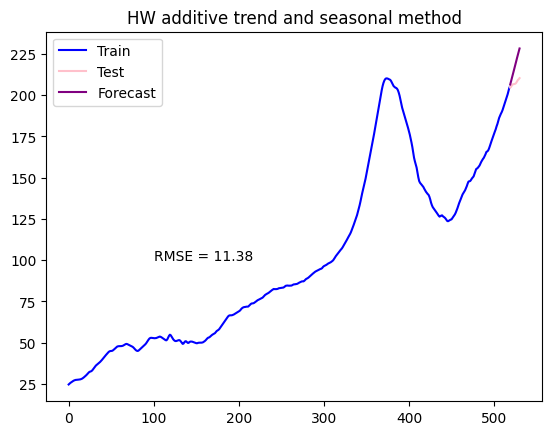

In [41]:
alpha = 0.8
beta = 0.02
gamma=0.1
hw_add= ExponentialSmoothing(y_train, seasonal_periods=12, trend='add',seasonal='add')
#fit1= hw_add.fit(smoothing_level=alpha,smoothing_trend=beta,smoothing_seasonal=gamma)
fit1= hw_add.fit()
fcast1 = fit1.forecast(len(y_test))

y_train.plot(color='blue',label='Train')
y_test.plot(color='pink',label='Test')
fcast1.plot(color='purple',label='Forecast')
error = round(sqrt(mean_squared_error(y_test,fcast1)),2)
plt.text(100,100,"RMSE = "+str(error))
plt.title("HW additive trend and seasonal method")
plt.legend(loc = 'best')
plt.show()

In [42]:
### HW Multiplicative

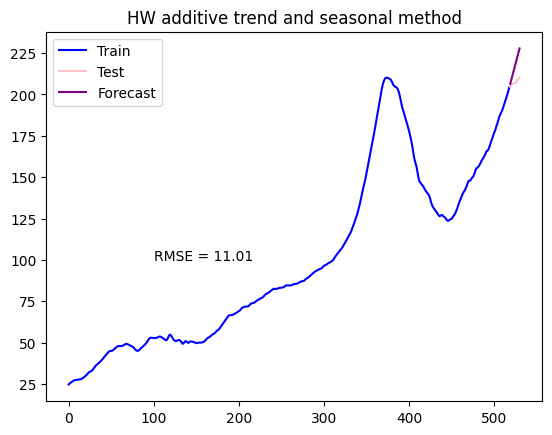

In [43]:
alpha = 1
beta = 0.08
gamma=0.01
hw_add= ExponentialSmoothing(y_train, seasonal_periods=12, trend='add',seasonal='mul')
#fit1= hw_add.fit(smoothing_level=alpha,smoothing_trend=beta,smoothing_seasonal=gamma)
fit1= hw_add.fit()
fcast1 = fit1.forecast(len(y_test))

y_train.plot(color='blue',label='Train')
y_test.plot(color='pink',label='Test')
fcast1.plot(color='purple',label='Forecast')
error = round(sqrt(mean_squared_error(y_test,fcast1)),2)
plt.text(100,100,"RMSE = "+str(error))
plt.title("HW additive trend and seasonal method")
plt.legend(loc = 'best')
plt.show()

In [44]:
##### HW additive with damped

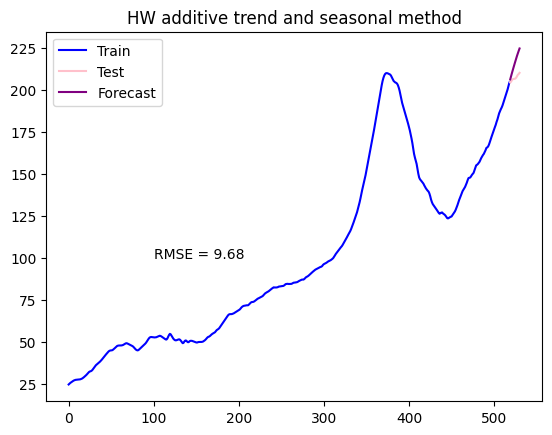

In [45]:
alpha = 0.9
beta = 0.5
gamma=0.1
phi=0.1
hw_add= ExponentialSmoothing(y_train, seasonal_periods=12, trend='add',seasonal='add',damped_trend=True)
#fit1= hw_add.fit(smoothing_level=alpha,smoothing_trend=beta,smoothing_seasonal=gamma,damping_trend=phi)
fit1= hw_add.fit()
fcast1 = fit1.forecast(len(y_test))

y_train.plot(color='blue',label='Train')
y_test.plot(color='pink',label='Test')
fcast1.plot(color='purple',label='Forecast')
error = round(sqrt(mean_squared_error(y_test,fcast1)),2)
plt.text(100,100,"RMSE = "+str(error))
plt.title("HW additive trend and seasonal method")
plt.legend(loc = 'best')
plt.show()

In [46]:
##### HW multiplicative with damped

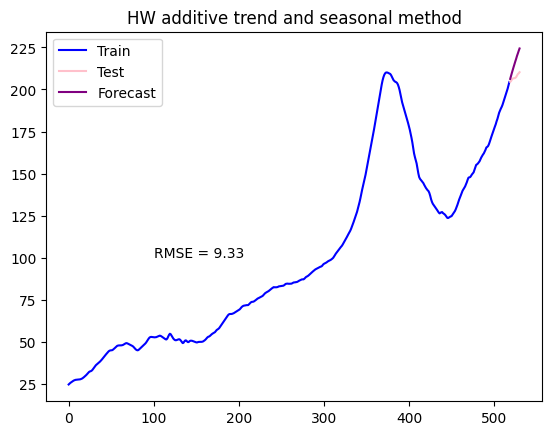

In [47]:
alpha = 0.9
beta = 0.5
gamma=0.1
phi=0.1
hw_add= ExponentialSmoothing(y_train, seasonal_periods=12, trend='add',seasonal='mul',damped_trend=True)
#fit1= hw_add.fit(smoothing_level=alpha,smoothing_trend=beta,smoothing_seasonal=gamma,damping_trend=phi)
fit1= hw_add.fit()
fcast1 = fit1.forecast(len(y_test))

y_train.plot(color='blue',label='Train')
y_test.plot(color='pink',label='Test')
fcast1.plot(color='purple',label='Forecast')
error = round(sqrt(mean_squared_error(y_test,fcast1)),2)
plt.text(100,100,"RMSE = "+str(error))
plt.title("HW additive trend and seasonal method")
plt.legend(loc = 'best')
plt.show()